In [3]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import re

In [4]:
domain_list = ['photo', 'art_painting', 'cartoon', 'sketch']
dir_path = "../results/DGAD/method6/"

In [5]:
# data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
file_name = 'results/intermediate_results/method=6,backbone=DGAD6,domain_cnt=3,normal_class=[0],anomaly_class=[1, 2, 3, 4, 5, 6],batch_size=30,steps_per_epoch=20,epochs=30,lr=0.0001,tau1=0.07,tau2=0.07,reg_lambda=1.0,NCE_lambda=1.0,PL_lambda=2.0,cnt=0.npz'
data = np.load(f'../{file_name}', allow_pickle=True)
data


NpzFile '../results/intermediate_results/method=6,backbone=DGAD6,domain_cnt=3,normal_class=[0],anomaly_class=[1, 2, 3, 4, 5, 6],batch_size=30,steps_per_epoch=20,epochs=30,lr=0.0001,tau1=0.07,tau2=0.07,reg_lambda=1.0,NCE_lambda=1.0,PL_lambda=2.0,cnt=0.npz' with keys: val_max_metric, train_results_loss, sub_train_results_loss, val_results_loss, val_AUROC_list...

In [6]:
# temp = data["pre_train_results_loss"].mean(axis=1)[70:]
# plt.plot(temp)
# temp

In [7]:
domain_test_trends = {
    "photo": {
        "test_loss_list":[],
        "AUROC":[],
        "AUPRC":[],
        },
    "art_painting": {
        "test_loss_list":[],
        "AUROC":[],
        "AUPRC":[],
        },
    "cartoon": {
        "test_loss_list":[],
        "AUROC":[],
        "AUPRC":[],
        },
    "sketch": {
        "test_loss_list":[],
        "AUROC":[],
        "AUPRC":[],
        },
}
for res in data["test_results_list"]:
    for key in res:
        domain_test_trends[key]["test_loss_list"].append(np.array(res[key]["test_loss_list"]).mean())
        domain_test_trends[key]["AUROC"].append(res[key]["AUROC"])
        domain_test_trends[key]["AUPRC"].append(res[key]["AUPRC"])

### 训练过程中 模型在test上下降趋势

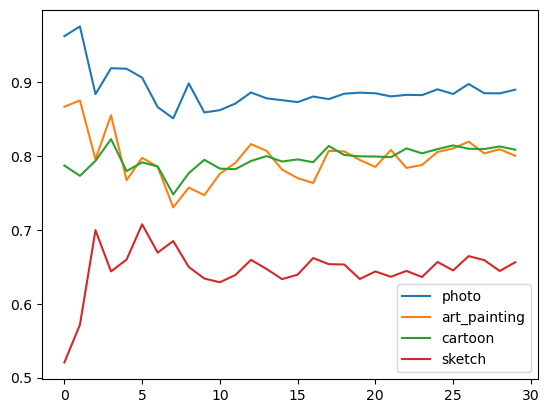

26
photo 0.8979591836734694
art_painting 0.8197991967871486
cartoon 0.81013587954462
sketch 0.664656771799629


In [15]:
max_val_epoch = data["val_max_metric"].item()['epoch']
print(max_val_epoch)

for domain in domain_list:
    plt.plot(domain_test_trends[domain]["AUROC"], label = domain)
    # print(domain, domain_test_trends[domain]["AUROC"][-1])
plt.legend()
plt.show()


for domain in domain_list:
    print(domain, domain_test_trends[domain]["AUROC"][max_val_epoch])

### 验证集上最好的结果

26
photo 0.8979591836734694
art_painting 0.8197991967871486
cartoon 0.81013587954462
sketch 0.664656771799629


### 训练集loss下降趋势

array([1.37623506, 0.52853919, 0.45955203, 0.30136065, 0.31143259,
       0.21512629, 0.20647593, 0.15491667, 0.21364148, 0.19820362,
       0.14666174, 0.12907434, 0.11233   , 0.10844213, 0.0908751 ,
       0.10547847, 0.11609018, 0.1054231 , 0.10124675, 0.09699288,
       0.10172414, 0.1117681 , 0.09827609, 0.10051329, 0.09897459,
       0.08572915, 0.09450362, 0.11357045, 0.10370349, 0.10761339])

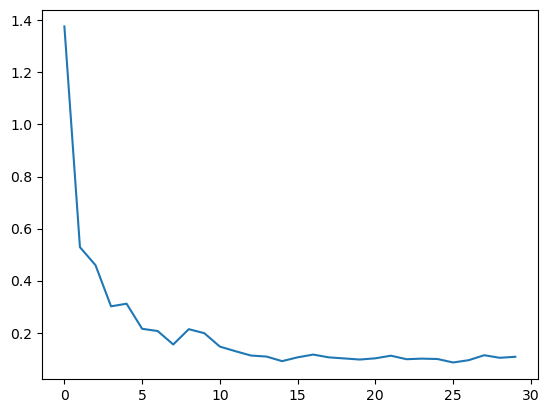

In [10]:
plt.plot(data["train_results_loss"].mean(axis=1))
data["train_results_loss"].mean(axis=1)

### 训练过程中，模型在val 下降趋势

In [11]:
data["val_max_metric"]

array({'AUROC': 0.8528138528138528, 'AUPRC': 0.5830851674737372, 'epoch': 26},
      dtype=object)

#### 验证集loss下降趋势

array([0.6544117 , 0.62321472, 0.5469878 , 0.53794143, 0.53561398,
       0.49445418, 0.51074231, 0.51687119, 0.50940545, 0.50132056,
       0.50528869, 0.5162458 , 0.4935555 , 0.51341336, 0.52286272,
       0.52018499, 0.51822066, 0.50320355, 0.50190611, 0.51535342,
       0.51953173, 0.49958702, 0.50689108, 0.52701432, 0.51662   ,
       0.50773652, 0.50454271, 0.5134062 , 0.50604175, 0.5033066 ])

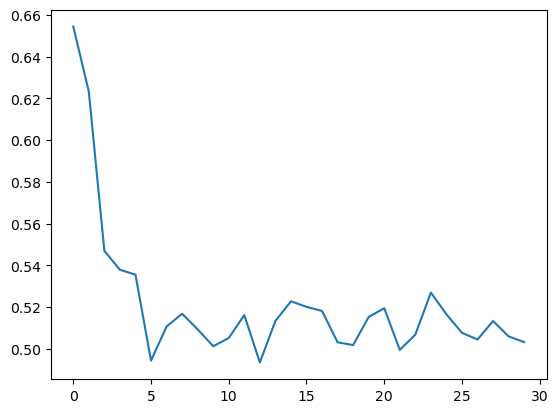

In [12]:
plt.plot(data["val_results_loss"].mean(axis=1))
data["val_results_loss"].mean(axis=1)

#### 验证集AUROC

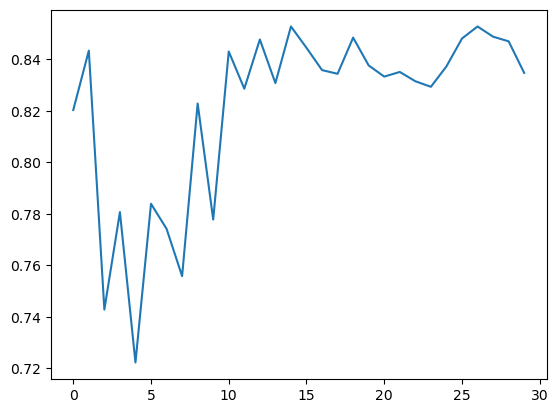

In [13]:
plt.plot(data["val_AUROC_list"])

#### 验证集AUPRC

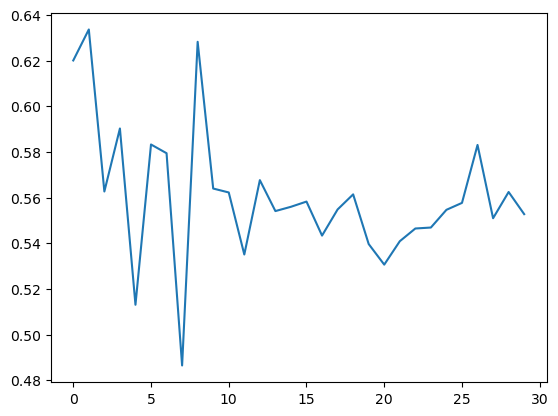

In [14]:
plt.plot(data["val_AUPRC_list"])